In [6]:
import openml
from openml.tasks import list_tasks, TaskType
import os
import json
import logging
import numpy as np
import time
import warnings
import pandas as pd
from scipy.stats import uniform, randint, loguniform, ttest_rel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from joblib import Memory
from scipy.stats import skew


# Import our binning class.
# DataBinner should be defined as in our previous example.
from src import DataBinner  

def get_memory_for_dataset(bin_method, task_id, seed):
    """
    Create (or reuse) a cache folder specific to this dataset/task.
    This way, each dataset version has its own cache files.
    """
    cache_dir = os.path.join("../cached_datasets", bin_method, str(task_id), str(seed))
    os.makedirs(cache_dir, exist_ok=True)
    return Memory(location=cache_dir, verbose=0)

# -------------------------
warnings.filterwarnings("ignore", category=UserWarning)
logging.getLogger("sklearn").setLevel(logging.ERROR)
logging.getLogger("lightgbm").setLevel(logging.ERROR)

# Parameter distribution for sklearn
param_dist_sklearn = {
    'gradientboostingregressor__n_estimators': randint(20, 300),
    'gradientboostingregressor__learning_rate': loguniform(0.001, 0.5),
    'gradientboostingregressor__max_depth': randint(3, 6),
    'gradientboostingregressor__subsample': uniform(0.5, 0.5),
    'gradientboostingregressor__max_features': uniform(0.5, 0.5)}

# Parameter distribution for LightGBM
param_dist_lgbm = {
    'lgbmregressor__n_estimators': randint(20, 300),
    'lgbmregressor__learning_rate': loguniform(0.001, 0.5),
    'lgbmregressor__num_leaves': randint(8, 64),
    'lgbmregressor__subsample': uniform(0.5, 0.5),
    'lgbmregressor__colsample_bytree': uniform(0.5, 0.5)
}

models = [
    (GradientBoostingRegressor(), "SKL", param_dist_sklearn),
    (LGBMRegressor(verbosity=-1, n_jobs=1, random_state=42), "LGBM", param_dist_lgbm), 
]

# List of binning methods to experiment with
binning_methods = [
    #'exact',
    'kmeans',
    'quantile',
    'linspace'
]

# Retrieve a benchmark suite from OpenML and select a task
benchmark_suite = openml.study.get_suite(336) #337 for classification
for benchmark_id in range(18):
    task_id = benchmark_suite.tasks[benchmark_id]

    task = openml.tasks.get_task(task_id)
    dataset = task.get_dataset()
    name = dataset.name
    X, y, _, _ = dataset.get_data(target=task.target_name)
    avg_skew = np.mean([skew(X[col]) for col in X.columns])
    y_skew = skew(y)
    print(f"Dataset: {name}, Avg Skew: {avg_skew:.2f}, Target Skew: {y_skew:.2f}")

Dataset: cpu_act, Avg Skew: 5.40, Target Skew: -3.42
Dataset: pol, Avg Skew: 4.78, Target Skew: 0.92
Dataset: elevators, Avg Skew: -0.60, Target Skew: 2.42
Dataset: wine_quality, Avg Skew: 1.36, Target Skew: 0.19
Dataset: Ailerons, Avg Skew: 0.60, Target Skew: -1.35
Dataset: houses, Avg Skew: 2.23, Target Skew: -0.17
Dataset: house_16H, Avg Skew: 6.14, Target Skew: -3.43
Dataset: diamonds, Avg Skew: 1.03, Target Skew: 0.12
Dataset: Brazilian_houses, Avg Skew: 30.23, Target Skew: 0.30
Dataset: Bike_Sharing_Demand, Avg Skew: 0.06, Target Skew: 1.28
Dataset: nyc-taxi-green-dec-2016, Avg Skew: 2.56, Target Skew: -0.00
Dataset: house_sales, Avg Skew: 2.40, Target Skew: 0.43
Dataset: sulfur, Avg Skew: -0.03, Target Skew: 6.72
Dataset: medical_charges, Avg Skew: 5.02, Target Skew: 0.88
Dataset: MiamiHousing2016, Avg Skew: 0.93, Target Skew: 0.74
Dataset: superconduct, Avg Skew: 0.67, Target Skew: 0.86
Dataset: yprop_4_1, Avg Skew: -0.29, Target Skew: -2.23
Dataset: abalone, Avg Skew: 0.62, Ta

In [ ]:
import openml
from openml.tasks import list_tasks, TaskType
import os
import json
import logging
import numpy as np
import time
import warnings
import pandas as pd
from scipy.stats import uniform, randint, loguniform, ttest_rel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from joblib import Memory
from sklearn.preprocessing import OneHotEncoder 

# Import our binning class.
# DataBinner should be defined as in our previous example.
from src import DataBinner  

def get_memory_for_dataset(bin_method, task_id, seed):
    """
    Create (or reuse) a cache folder specific to this dataset/task.
    This way, each dataset version has its own cache files.
    """
    cache_dir = os.path.join("../cached_datasets", bin_method, str(task_id), str(seed))
    os.makedirs(cache_dir, exist_ok=True)
    return Memory(location=cache_dir, verbose=0)

# -------------------------
warnings.filterwarnings("ignore", category=UserWarning)
logging.getLogger("sklearn").setLevel(logging.ERROR)
logging.getLogger("lightgbm").setLevel(logging.ERROR)

# Parameter distribution for sklearn
param_dist_sklearn = {
    'gradientboostingregressor__n_estimators': randint(20, 300),
    'gradientboostingregressor__learning_rate': loguniform(0.001, 0.5),
    'gradientboostingregressor__max_depth': randint(3, 6),
    'gradientboostingregressor__subsample': uniform(0.5, 0.5),
    'gradientboostingregressor__max_features': uniform(0.5, 0.5)}

# Parameter distribution for LightGBM
param_dist_lgbm = {
    'lgbmregressor__n_estimators': randint(20, 300),
    'lgbmregressor__learning_rate': loguniform(0.001, 0.5),
    'lgbmregressor__num_leaves': randint(8, 64),
    'lgbmregressor__subsample': uniform(0.5, 0.5),
    'lgbmregressor__colsample_bytree': uniform(0.5, 0.5)
}

models = [
    (GradientBoostingRegressor(), "SKL", param_dist_sklearn),
    #(LGBMRegressor(verbosity=-1, n_jobs=1, random_state=42), "LGBM", param_dist_lgbm), 
]

# List of binning methods to experiment with
binning_methods = [
    #'exact',
    'kmeans',
    'quantile',
    'linspace'
]

# Retrieve a benchmark suite from OpenML and select a task
benchmark_suite = openml.study.get_suite(353) #337 for classification
benchmark_id = 0
task_id = benchmark_suite.tasks[benchmark_id]

task = openml.tasks.get_task(task_id)
dataset = task.get_dataset()
name = dataset.name
obs = dataset.qualities['NumberOfInstances']
features = dataset.qualities['NumberOfFeatures']
print(f"===== DATASET {name} with {obs} observations and {features} features =====")


# Get X and y
X, y = task.get_X_and_y(dataset_format='dataframe')
transform_cols = []
for col_idx, dtype in enumerate(X.dtypes):
    if dtype == 'object' or dtype == 'category':
        transform_cols.append(X.columns[col_idx])

# Transform categorical columns to one-hot
X = pd.get_dummies(X, columns=transform_cols, drop_first=True)


===== DATASET abalone with 4177.0 observations and 9.0 features =====
category
0
float64
float64
float64
float64
float64
float64
float64


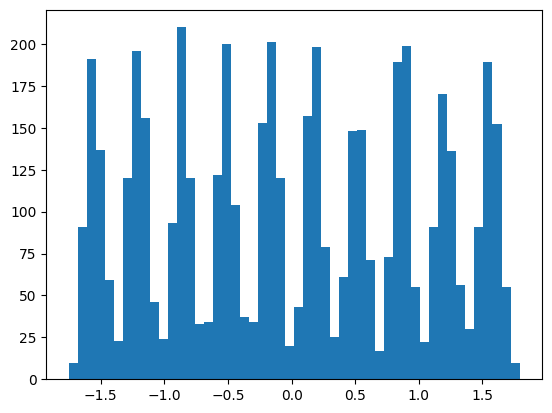

In [52]:

def centred_linspace(span, n_modes):
    if n_modes == 1:
        return np.array([0.0])
    return np.linspace(-span, span, n_modes)


def make_synthetic(n_obs, n_features, n_modes, mode_size, skew_factor, skew_scale, rng):
    """Return DataFrame X and target y.
    Parameters:
    -----------
    n_obs : int
        Number of observations.
    n_features : int
        Number of features.
    n_modes : int
        Number of modes in the multimodal distribution.
    mode_size : float
        Difference between modes.
    skew_factor : float
        Probability of adding skewness.
    skew_scale : float
        Scale of the skewness.
    rng : np.random.Generator
        Random number generator.
    Returns:
    --------
    X : pd.DataFrame
        DataFrame with n_obs rows and n_features columns.
    """
    data = np.zeros((n_obs, n_features))
    # --- Multimodal component
    means = np.linspace(0, mode_size * (n_modes - 1), n_modes)
    for j in range(n_features):
        mode_choice = rng.integers(0, n_modes, size=n_obs)
        data[:, j] = rng.normal(loc=means[mode_choice], scale=1.0)
        data[:, j] = (data[:, j] - data[:, j].mean()) / data[:, j].std() # Standardizing
    
    # --- Skewness: add positive outliers with prob = skew_factor
    if skew_factor > 0:
        mask = rng.random(size=data.shape) < skew_factor
        data[mask] += rng.exponential(scale=skew_scale, size=mask.sum())
    X = pd.DataFrame(data, columns=[f"f{j}" for j in range(n_features)])
    y = X.sum(axis=1) + rng.normal(0, 0.1, size=n_obs)
    return X, y

X, y = make_synthetic(5000, 1, 10, 5, 0, 0, np.random.default_rng(42))
import matplotlib.pyplot as plt
plt.hist(X.values, bins=50)
plt.show()


In [57]:
import numpy as np

negative_vals = 0
for idx in range(1, 6):
    exp = np.load(f'../d{idx}.npy')
    mean = np.mean(exp, axis=2)
    negative_vals += np.sum(mean < 0)
    
print(f"Negative values in the dataset: {negative_vals}")

Negative values in the dataset: 1
